# Apollo2506 Facial Recognition Dataset

## Processing Features of Images

In [1]:
import os
import sys
# Define paths
TESTING_PATH = os.path.join(
    os.path.dirname(os.path.realpath(os.curdir)), 
    'facial-recognition-dataset',
    'versions',
    '3',
    'Testing',
    'Testing'
)

TRAINING_PATH = os.path.join(
    os.path.dirname(os.path.realpath(os.curdir)), 
    'facial-recognition-dataset',
    'versions',
    '3',
    'Training',
    'Training'
)
AI_MODEL_PATH = os.path.abspath(os.path.join(os.path.curdir, os.pardir, os.pardir, os.pardir))
sys.path.append(AI_MODEL_PATH)

In [2]:
from image_preprocessing import preprocess, visualize_image
import numpy as np
import matplotlib.pyplot as plt

## Load the Data

In [3]:
# Extract Unique Emotions in this dataset
uniqueEmotions_Testing = os.listdir(TESTING_PATH)
uniqueEmotions_Training = os.listdir(TRAINING_PATH)
uniqueEmotions = list(set(uniqueEmotions_Testing + uniqueEmotions_Training))
uniqueEmotions

['Fear', 'Angry', 'Happy', 'Sad', 'Neutral', 'Suprise']

Processing Training Images...
Before processing:


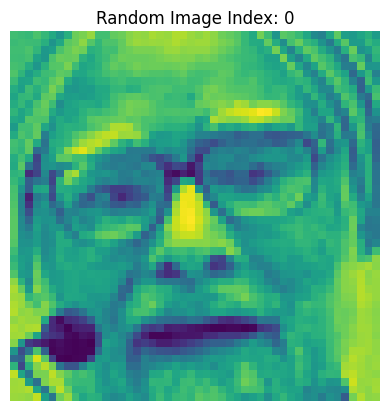

After processing:


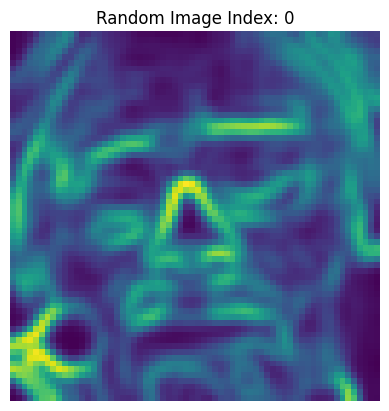

Before processing:


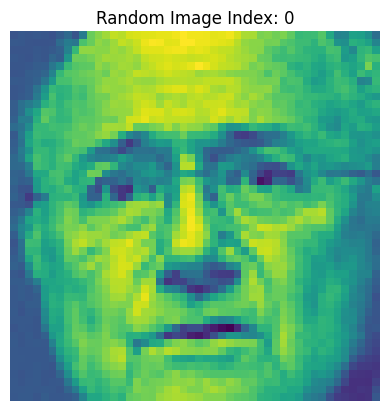

After processing:


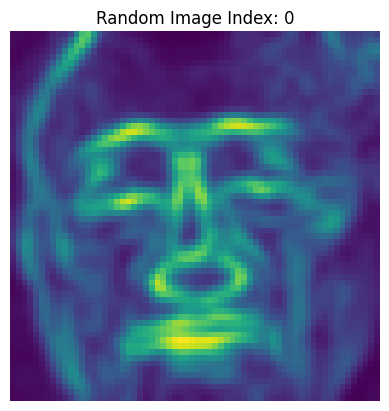

Before processing:


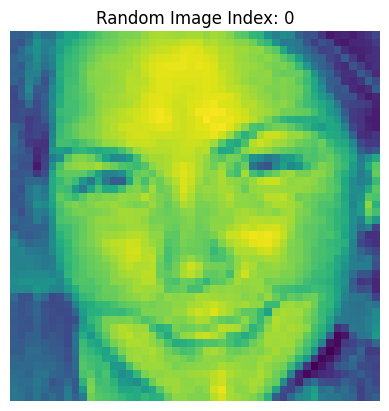

After processing:


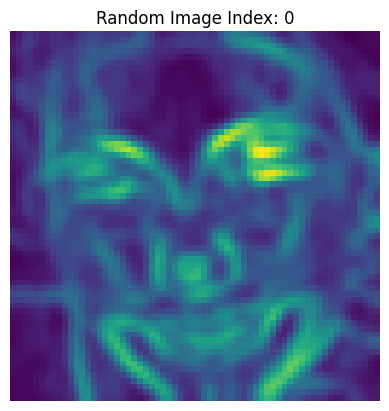

Before processing:


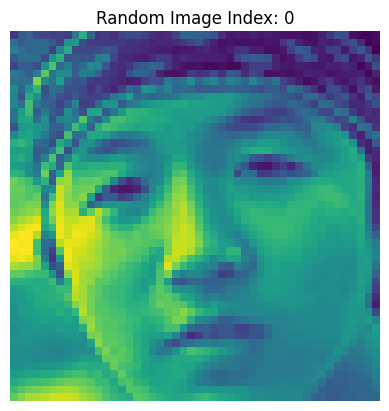

After processing:


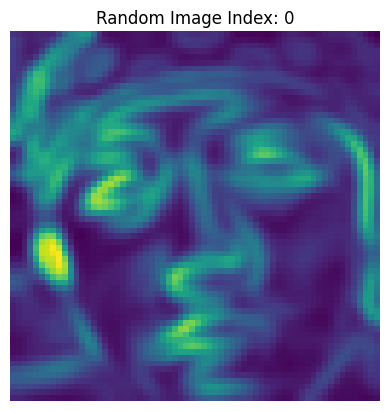

Before processing:


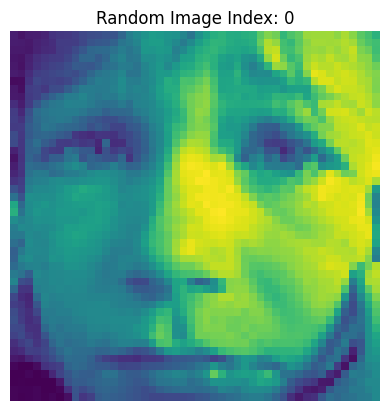

After processing:


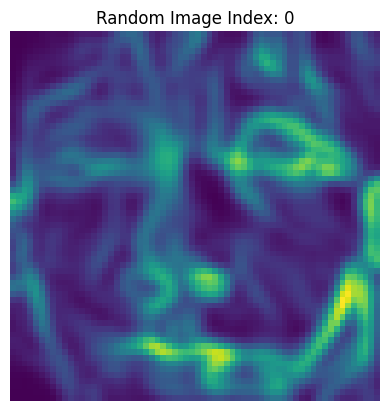

Before processing:


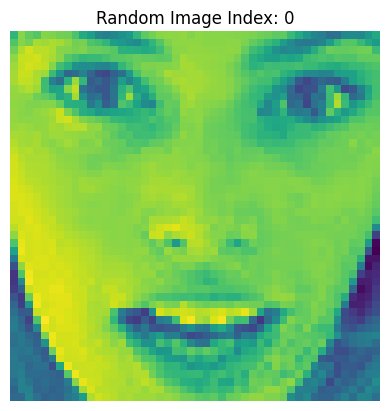

After processing:


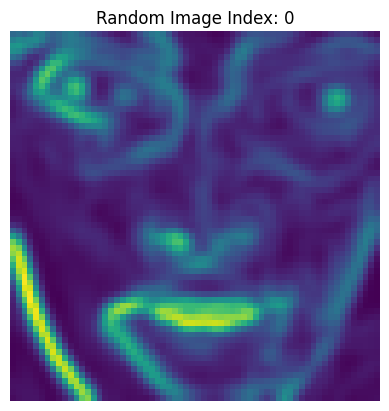

Completed Processing Training Images...
Processing Testing Images...
Before processing:


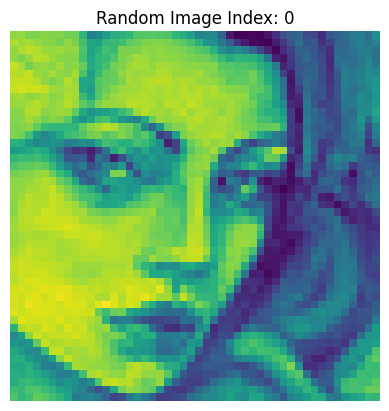

After processing:


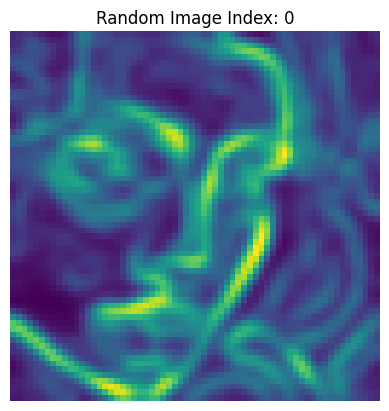

Before processing:


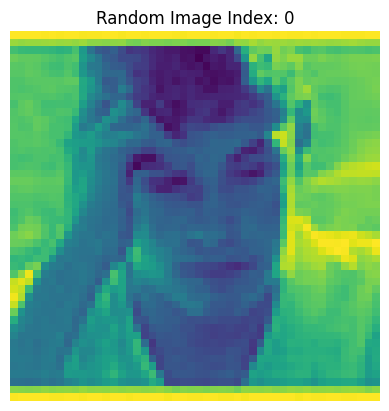

After processing:


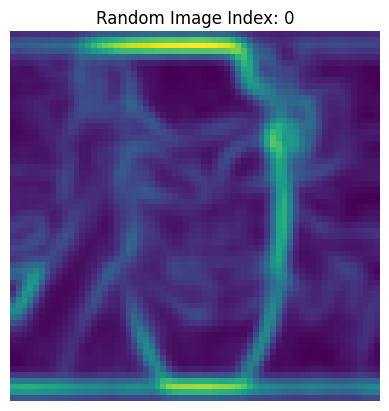

Before processing:


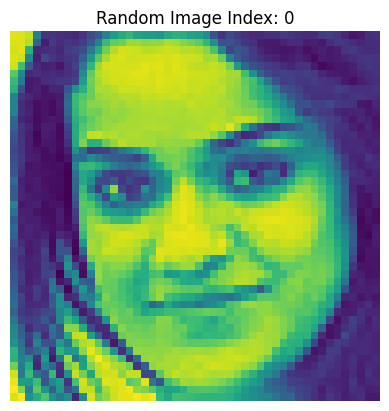

After processing:


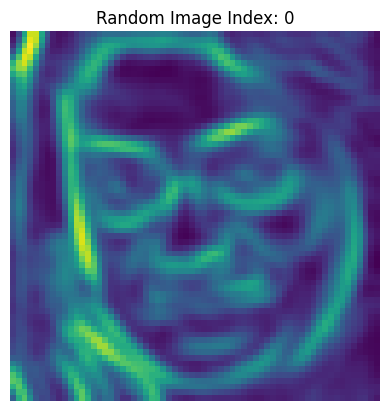

Before processing:


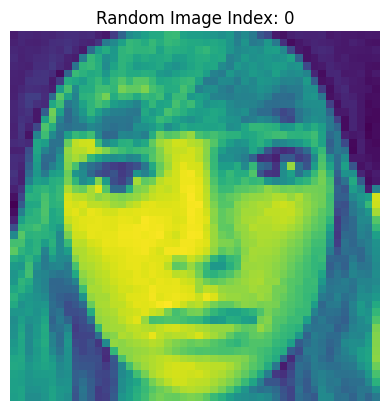

After processing:


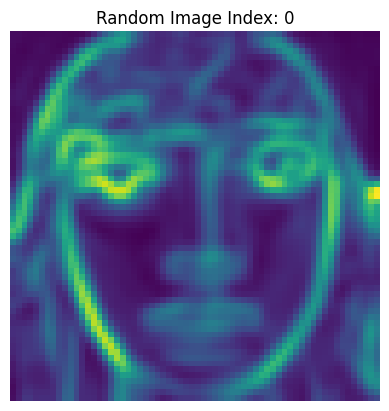

Before processing:


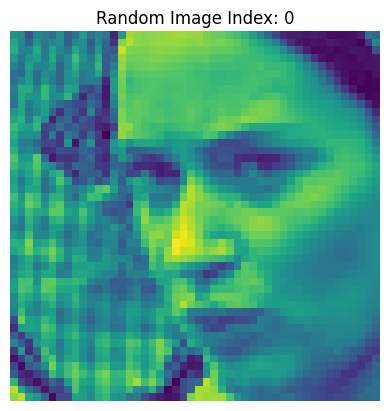

After processing:


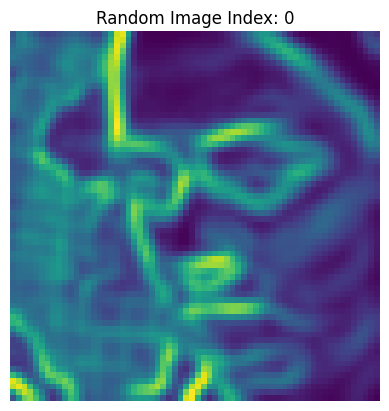

Before processing:


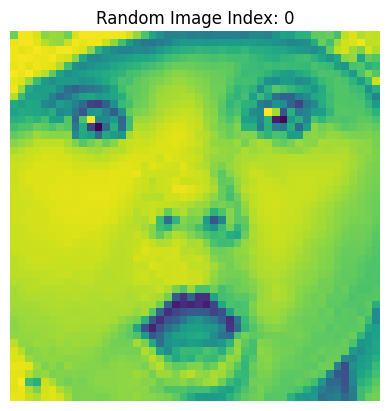

After processing:


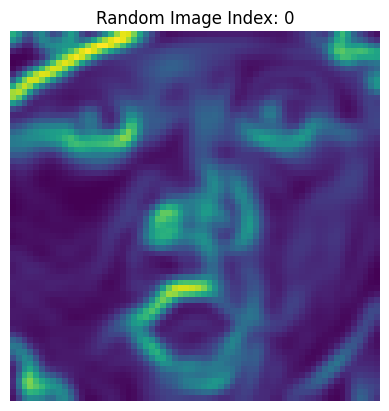

Completed Processing Testing Images...
Number of Training Images: 28273
Number of Testing Images: 7067
Shape of Training Image: (28273, 64, 64)
Shape of Testing Image: (7067, 64, 64)


In [7]:
X_train = []
X_test = []

# Process training images
print('Processing Training Images...')
for emotion in uniqueEmotions_Training:
    for index, imageName in enumerate(os.listdir(os.path.join(TRAINING_PATH, emotion))):
        imagePath = os.path.join(TRAINING_PATH, emotion, imageName)
        image = plt.imread(imagePath)
        if (index == 0):
            print("Before processing:")
            visualize_image(np.array([image]))
        processed_image = preprocess(
            img_array=image,
            isCurrentGrayScale=True
        )
        if (index == 0):
            print("After processing:")
            visualize_image(np.array([processed_image]))
        X_train.append(processed_image)
print('Completed Processing Training Images...')

# Process testing images
print('Processing Testing Images...')
for emotion in uniqueEmotions_Testing:
    for index, imageName in enumerate(os.listdir(os.path.join(TESTING_PATH, emotion))):
        imagePath = os.path.join(TESTING_PATH, emotion, imageName)
        image = plt.imread(imagePath)
        if (index == 0):
            print("Before processing:")
            visualize_image(np.array([image]))
        processed_image = preprocess(
            img_array=image,
            isCurrentGrayScale=True
        )
        if (index == 0):
            print("After processing:")
            visualize_image(np.array([processed_image]))
        X_test.append(processed_image)
print('Completed Processing Testing Images...')

print(f"Number of Training Images: {len(X_train)}")
print(f"Number of Testing Images: {len(X_test)}")

# Convert to numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)

# Checkings
print(f"Shape of Training Image: {X_train.shape}")
print(f"Shape of Testing Image: {X_test.shape}")

Looks like there are 28273 images in the training set and 7067 images in the test set, with images in 64 x 64 pixels in grayscale.

In [8]:
# Save to files
if not os.path.exists('features'):
    os.makedirs('features')
np.save('features/X_train.npy', X_train)
np.save('features/X_test.npy', X_test)
print('Saved to files...')

Saved to files...
